# Attributions for Siamese Encoders - Demo

In [1]:
import torch
from xsbert import utils
from xsbert.models import XSMPNet, XSRoberta, load_checkpoint
import zipfile
import os
from os.path import join, exists

/mount/arbeitsdaten/tcl/Users/moellels/anaconda/envs/xsbert/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### loading a model

In [3]:
model_name = 'xs_mpnet'
model = load_checkpoint(model_name)
model.to(torch.device('cuda:1'))

initializing


XSMPNet(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [3]:
# model_path = 'checkpoints/xs_mpnet/'
# model = XSMPNet(model_path)
model_path = 'checkpoints/xs_distilroberta/'
model = XSRoberta(model_path)
model.to(torch.device('cuda:0'))

XSRoberta(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

### initializing attributions

In [4]:
model.reset_attribution()
model.init_attribution_to_layer(idx=9, N_steps=100)

### computing attributions

In [5]:
texta = 'The coffee is bad.'
textb = 'This is not a good coffee.'

In [6]:
A, tokens_a, tokens_b, score, ra, rb, rr = model.explain_similarity(
    texta, 
    textb, 
    move_to_cpu=False,
    compute_lhs=True
)

100%|██████████| 768/768 [00:03<00:00, 245.25it/s]


### attribution accuracy

In [7]:
tot_attr = A.sum().item()
attr_err = torch.abs(A.sum() - (score - ra - rb + rr)).item()
print('model prediction: ', score)
print('total attribution: ', tot_attr)
print('reference terms: ', ra, rb, rr)
print('attribution error: ', attr_err)

model prediction:  0.8484635353088379
total attribution:  0.8538110852241516
reference terms:  0.0 0.0 0.0
attribution error:  0.005347549915313721


### plotting attributions

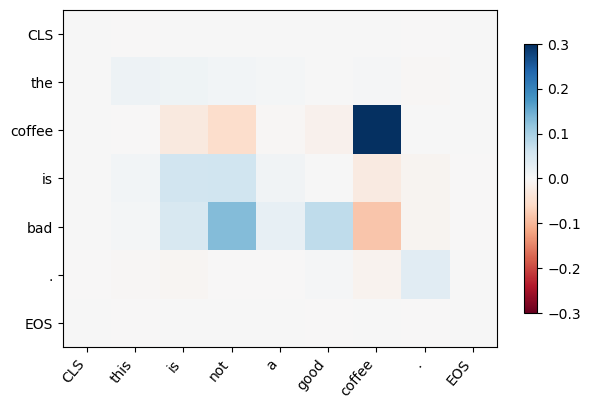

In [8]:
utils.plot_attributions(
    A, 
    tokens_a, 
    tokens_b, 
    range=.3,
    show_colobar=True, 
    shrink_cbar=.5
)